In [2]:
import datetime as dt
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random, json, codecs

from keras.utils import plot_model as pltmdl
from sklearn.compose import make_column_transformer as mct
from sklearn.model_selection import train_test_split as tts
from sklearn.preprocessing import MinMaxScaler as mms, OneHotEncoder as ohe

dateTime = dt.datetime.now()

print("Date: %s-%s-%s \n" % (dateTime.day, dateTime.month, dateTime.year),
      "TensorFlow Version: ", tf.__version__, "\n",
      "Numpy Version: ", np.__version__, "\n",
      "Pandas Version: ", pd.__version__, "\n"
      )

Date: 10-8-2022 
 TensorFlow Version:  2.9.1 
 Numpy Version:  1.23.0 
 Pandas Version:  1.4.3 



## Specialized Functions for NNR

In [8]:
class NNR_Checking:  
  def prediction_td(self, model, x_test):
    return tf.constant(tf.squeeze(model.predict(x_test)))
  
  def pred_test_sPlt(self, y_test, y_pred):
    x_test = tf.expand_dims(tf.range(0, y_test.shape), axis = -1)
    plt.Figure(figsize = (10, 8))
    plt.scatter(x_test, y_test, label = "Test data", color = "red")
    plt.scatter(x_test, y_pred, label = "Predicted data", color = "blue")
    plt.legend()
    return plt.show()
  
  def dataFrame(self, history):
    pd.DataFrame(history.history).plot()
    plt.ylabel("loss")
    plt.xlabel("epochs")
    return
  
  def dataFrame_lh(self, history):
    pd.DataFrame(history).plot()
    plt.ylabel("loss")
    plt.xlabel("epochs")
    return
  
  def train_eval_comparison_native(self, history, eval):
    print("Training Loss: ", np.around(history.history['loss'][-1], 3), "\n"
      "Evaluation Loss: ", np.around(eval[0], 3), "\n"
      "Difference: ", np.around(tf.abs(history.history['loss'][-1] - eval[0]).numpy(), 3)
      )
    
  def train_eval_comparison_native_lh(self, history, eval):
    print("Training Loss: ", np.around(history['loss'][-1], 3), "\n"
      "Evaluation Loss: ", np.around(eval[0], 3), "\n"
      "Difference: ", np.around(tf.abs(history['loss'][-1] - eval[0]).numpy(), 3)
      )
    
  def train_eval_comparison_panda_table(self, history, eval):
    eval_form = [
      ["Training Data", np.around(history.history['loss'][-1], 3), np.around(history.history['mae'][-1], 3)],
      ["Evaluation Data", np.around(eval[0], 3), np.around(eval[1], 3)],
      ["Difference", 
        np.around((history.history['loss'][-1] - eval[0]), 3),
        np.around((history.history['mae'][-1] - eval[1]), 3)]
    ]
    return pd.DataFrame(eval_form, columns = ["Data", "Loss", "MAE"])
  
  def train_eval_comparison_panda_table_lh(self, history, eval):
    eval_form = [
      ["Training Data", np.around(history['loss'][-1], 3), np.around(history['mae'][-1], 3)],
      ["Evaluation Data", np.around(eval[0], 3), np.around(eval[1], 3)],
      ["Difference", 
        np.around((history['loss'][-1] - eval[0]), 3),
        np.around((history['mae'][-1] - eval[1]), 3)]
    ]
    return pd.DataFrame(eval_form, columns = ["Data", "Loss", "MAE"])
  
  def saveHist(self, path,history):
    new_hist = {}
    for key in list(history.history.keys()):
      new_hist[key]=history.history[key]
      if type(history.history[key]) == np.ndarray:
        new_hist[key] = history.history[key].tolist()
      elif type(history.history[key]) == list:
        if  type(history.history[key][0]) == np.float64:
          new_hist[key] = list(map(float, history.history[key]))
          
    with codecs.open(path, 'w', encoding='utf-8') as file:
        json.dump(new_hist, file, separators=(',', ':'), sort_keys=True, indent=4) 

  def loadHist(self, path):
    with codecs.open(path, 'r', encoding='utf-8') as file:
      n = json.loads(file.read())
    return n
  
  def save(self, path, name, history, model):
    model.save(path + name + ".h5")
    self.saveHist(path + name + "_h.json", history)
    return pltmdl(model = model, show_shapes = True, to_file = path + name + ".png")
    
nnr = NNR_Checking()

# Demo Using Simple Random Generated Scalar Data's

In [ ]:
# Evaluate
np.random.seed(43)

x_test = tf.constant(np.array(np.random.randint(-10, 10, [100])))

y_test = x_test + 10

scalar_m = tf.keras.Sequential([
  tf.keras.layers.Dense(1),
])

scalar_m.compile(
  loss = tf.keras.losses.MeanAbsoluteError(),
  optimizer = tf.keras.optimizers.SGD(),
  metrics = "mae"
)

scalar_m_h = scalar_m.fit(x_test, y_test, epochs = 10)

eval_scalar_m = scalar_m.evaluate(x_test, y_test)

In [ ]:
# Predict w/ test Data
y_pred = scalar_m.predict(x_test)
y_pred = tf.constant(tf.squeeze(y_pred))
y_pred[0].numpy(), y_test[0].numpy()

In [ ]:
# Plot
pd.DataFrame(scalar_m_h.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

In [ ]:
# Native Evaluation of Model Data
print("Training Loss: ", np.around(scalar_m_h.history['loss'][-1], 3), "\n"
      "Evaluation Loss: ", np.around(eval_scalar_m[0], 3), "\n"
      "Difference: ", np.around(tf.abs(scalar_m_h.history['loss'][-1] - eval_scalar_m[0]).numpy(), 3)
      )

In [ ]:
# Panda table
eval_form = [
  ["Training Data", np.around(scalar_m_h.history['loss'][-1], 3), np.around(scalar_m_h.history['mae'][-1], 3)],
  ["Evaluation Data", np.around(eval_scalar_m[0], 3), np.around(eval_scalar_m[1], 3)],
  ["Difference", 
    np.around((scalar_m_h.history['loss'][-1] - eval_scalar_m[0]), 3),
    np.around((scalar_m_h.history['mae'][-1] - eval_scalar_m[1]), 3)]
]

pd.DataFrame(eval_form, columns = ["Data", "Loss", "MAE"])

In [ ]:
# Predicting New Data
def predict(guess):
  y_predict = scalar_m.predict([guess])
  print("Difference between Correct: %.2f and Prediction: %.2f = %.2f" % (guess + 10, y_predict, (guess + 10) - y_predict))
  return

predict(20)
predict(2)
predict(100)
predict(2342)


### Other

In [ ]:
# Summary
scalar_m.summary()

In [ ]:
# Plot Model
pltmdl(model = scalar_m, show_shapes = True, )

## Improvement Scalar NNR Model
- Layer Modification
  - Layer Count
  - Units
  - Input size
  - Activators
- Compilation
  - Loss
  - Optimizer
    - Adam, learning rate
  - Metrics
- Fitting
  - epochs

In [ ]:
tf.random.set_seed(42)
np.random.seed(42)

x = tf.constant(np.array(np.random.randint(-10, 10, [100])))

y = x + 10

x.numpy()[:5], y.numpy()[:5]

np.random.seed(43)

x_test = tf.constant(np.array(np.random.randint(-10, 10, [100])))

y_test = x_test + 10

### Model 0

#### Modeling

In [ ]:
scalar_m0 = tf.keras.Sequential()
scalar_m0.add(tf.keras.layers.Dense(1, name = "hidden_output_layer"))

scalar_m0.compile(loss = 'mae', optimizer = 'sgd', metrics = 'mae')

scalar_m0_h = scalar_m0.fit(tf.expand_dims(x, axis = -1), y, epochs = 500)

In [ ]:
scalar_m0.summary()

In [ ]:
eval_scalar_m0 = scalar_m0.evaluate(x_test, y_test)
eval_scalar_m0

In [ ]:
y_pred = nnr.prediction_td(scalar_m0, x_test)

print("Prediction: ", y_pred[0].numpy(), "\n",
      "Test: ", y_test[0].numpy())

In [ ]:
nnr.dataFrame(scalar_m0_h)

In [ ]:
nnr.train_eval_comparison_native(scalar_m0_h, eval_scalar_m0)

In [ ]:
nnr.train_eval_comparison_panda_table(scalar_m0_h, eval_scalar_m0)

#### Change According to Evaluation

In [ ]:
scalar_m0 = tf.keras.Sequential()
scalar_m0.add(tf.keras.layers.Dense(1, name = "hidden_output_layer"))

scalar_m0.compile(loss = 'mae', optimizer = 'sgd', metrics = 'mae')

scalar_m0_h = scalar_m0.fit(tf.expand_dims(x, axis = -1), y, epochs = 300)

In [ ]:
scalar_m0.summary()

In [ ]:
eval_scalar_m0 = scalar_m0.evaluate(x_test, y_test)
eval_scalar_m0

In [ ]:
y_pred = nnr.prediction_td(scalar_m0, x_test)

print("Prediction: ", y_pred[0].numpy(), "\n",
      "Test: ", y_test[0].numpy())

In [ ]:
nnr.dataFrame(scalar_m0_h)

In [ ]:
nnr.train_eval_comparison_native(scalar_m0_h, eval_scalar_m0)

In [ ]:
nnr.train_eval_comparison_panda_table(scalar_m0_h, eval_scalar_m0)

#### Saving/Loading of Models and History and Evaluation of Saved Models and History

##### Saving Model and History

In [ ]:
nnr.save("./saved_files/NNRSC/Scalar_Model/m_0/", "scalar_m", scalar_m0_h, scalar_m0)

##### Loading Model and History

In [ ]:
scalar_m0_h5 = tf.keras.models.load_model("./saved_files/NNRSC/Scalar_Model/m_0/scalar_m.h5")
scalar_m0_h_json = nnr.loadHist('./saved_files/NNRSC/Scalar_Model/m_0/scalar_m_h.json')

##### Evaluation of Saved Data

In [ ]:
eval_scalar_m0 = scalar_m0_h5.evaluate(x_test, y_test)
eval_scalar_m0

In [ ]:
y_pred = nnr.prediction_td(scalar_m0_h5, x_test)

print("Prediction: ", y_pred[0].numpy(), "\n",
      "Test: ", y_test[0].numpy())

In [ ]:
nnr.pred_test_sPlt(x_test, y_test, y_pred)

In [ ]:
nnr.dataFrame_lh(scalar_m0_h_json)

In [ ]:
nnr.train_eval_comparison_native_lh(scalar_m0_h_json, eval_scalar_m0)

In [ ]:
nnr.train_eval_comparison_panda_table_lh(scalar_m0_h_json, eval_scalar_m0)

### Model 1
- Add 1 layer with 50 units

#### Modeling

In [ ]:
scalar_m1 = tf.keras.Sequential()
scalar_m1.add(tf.keras.layers.Dense(50, name = "hidden_layer"))
scalar_m1.add(tf.keras.layers.Dense(1, name = "output_layer"))

scalar_m1.compile(loss = 'mae', optimizer = 'sgd', metrics = 'mae')

scalar_m1_h = scalar_m1.fit(tf.expand_dims(x, axis = -1), y, epochs = 300)

In [ ]:
eval_scalar_m1 = scalar_m1.evaluate(x_test, y_test)
eval_scalar_m1

In [ ]:
y_pred = nnr.prediction_td(scalar_m1, x_test)

print("Prediction: ", y_pred[0].numpy(), "\n",
      "Test: ", y_test[0].numpy())

In [ ]:
nnr.dataFrame(scalar_m1_h)

In [ ]:
nnr.train_eval_comparison_native(scalar_m1_h, eval_scalar_m1)

In [ ]:
nnr.train_eval_comparison_panda_table(scalar_m1_h, eval_scalar_m1)

#### Change According to Eluation

In [ ]:
scalar_m1 = tf.keras.Sequential()
scalar_m1.add(tf.keras.layers.Dense(100, name = "hidden_layer"))
scalar_m1.add(tf.keras.layers.Dense(1, name = "output_layer"))

scalar_m1.compile(loss = 'mae', optimizer = 'sgd', metrics = 'mae')

scalar_m1_h = scalar_m1.fit(tf.expand_dims(x, axis = -1), y, epochs = 300)

In [ ]:
eval_scalar_m1 = scalar_m1.evaluate(x_test, y_test)
eval_scalar_m1

In [ ]:
y_pred = nnr.prediction_td(scalar_m1, x_test)

print("Prediction: ", y_pred[0].numpy(), "\n",
      "Test: ", y_test[0].numpy())

In [ ]:
nnr.dataFrame(scalar_m1_h)

In [ ]:
nnr.train_eval_comparison_native(scalar_m1_h, eval_scalar_m1)

In [ ]:
nnr.train_eval_comparison_panda_table(scalar_m1_h, eval_scalar_m1)

#### Saving/Loading of Models and History and Evaluation of Saved Models and History

##### Saving Model and History

In [ ]:
nnr.save("./saved_files/NNRSC/Scalar_Model/m_1/", "scalar_m1", scalar_m1_h, scalar_m1)

##### Loading Model and History

In [ ]:
scalar_m1_h5 = tf.keras.models.load_model("./saved_files/NNRSC/Scalar_Model/m_1/scalar_m1.h5")
scalar_m1_h_json = nnr.loadHist('./saved_files/NNRSC/Scalar_Model/m_1/scalar_m1_h.json')

##### Evaluation of Saved Data

In [ ]:
eval_scalar_m1 = scalar_m1_h5.evaluate(x_test, y_test)
eval_scalar_m1

In [ ]:
y_pred = nnr.prediction_td(scalar_m1_h5, x_test)

print("Prediction: ", y_pred[0].numpy(), "\n",
      "Test: ", y_test[0].numpy())

In [ ]:
nnr.pred_test_sPlt(x_test, y_test, y_pred)

In [ ]:
nnr.dataFrame_lh(scalar_m1_h_json)

In [ ]:
nnr.train_eval_comparison_native_lh(scalar_m1_h_json, eval_scalar_m1)

In [ ]:
nnr.train_eval_comparison_panda_table_lh(scalar_m1_h_json, eval_scalar_m1)


### Model 2
- Activation Function = Adam(learning_rate = 0.01)

#### Modeling

In [ ]:
scalar_m2 = tf.keras.Sequential()
scalar_m2.add(tf.keras.layers.Dense(1, name = "output_layer"))

scalar_m2.compile(loss = 'mae', optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01), metrics = 'mae')

scalar_m2_h = scalar_m2.fit(tf.expand_dims(x, axis = -1), y, epochs = 300)

In [ ]:
scalar_m2.summary()

In [ ]:
eval_scalar_m2 = scalar_m2.evaluate(x_test, y_test)
eval_scalar_m2

In [ ]:
y_pred = nnr.prediction_td(scalar_m2, x_test)

print("Prediction: ", y_pred[0].numpy(), "\n",
      "Test: ", y_test[0].numpy())

In [ ]:
nnr.dataFrame(scalar_m2_h)

In [ ]:
nnr.train_eval_comparison_native(scalar_m2_h, eval_scalar_m2)

In [ ]:
nnr.train_eval_comparison_panda_table(scalar_m2_h, eval_scalar_m2)

#### Saving/Loading of Models and History and Evaluation of Saved Models and History

##### Saving Model and History

In [ ]:
nnr.save("./saved_files/NNRSC/Scalar_Model/m_2/", "scalar_m2", scalar_m2_h, scalar_m2)

##### Loading Model and History

In [ ]:
scalar_m2_h5 = tf.keras.models.load_model("./saved_files/NNRSC/Scalar_Model/m_2/scalar_m2.h5")
scalar_m2_h_json = nnr.loadHist('./saved_files/NNRSC/Scalar_Model/m_2/scalar_m2_h.json')

##### Evaluation of Saved Data

In [ ]:
eval_scalar_m2 = scalar_m2_h5.evaluate(x_test, y_test)
eval_scalar_m2

In [ ]:
y_pred = nnr.prediction_td(scalar_m2_h5, x_test)

print("Prediction: ", y_pred[0].numpy(), "\n",
      "Test: ", y_test[0].numpy())

In [ ]:
nnr.pred_test_sPlt(x_test, y_test, y_pred)

In [ ]:
nnr.dataFrame_lh(scalar_m2_h_json)

In [ ]:
nnr.train_eval_comparison_native_lh(scalar_m2_h_json, eval_scalar_m2)

In [ ]:
nnr.train_eval_comparison_panda_table_lh(scalar_m2_h_json, eval_scalar_m2)

### Model Summary
- Comparison of Each Models

In [ ]:
model = "scalar_m"
cModel = 3

model_data = []
variable = vars()
for x in range(cModel):
  h_loss = np.around(variable[model + str(x) + "_h_json"]['loss'][-1], 3)
  h_mae = np.around(variable[model + str(x) + "_h_json"]['mae'][-1], 3)
  
  e_loss = np.around(variable["eval_" + model + str(x)][0], 3)
  e_mae = np.around(variable["eval_" + model + str(x)][1], 3)
  
  model_data.append([("Model " + str(x)), h_loss, h_mae, e_loss, e_mae])

pd.DataFrame(model_data, columns = ["Model", "Training Loss", "Training MAE", "Eval Loss", "Eval MAE"])

In [55]:
ax = pd.DataFrame(scalar_m0_h_json["loss"]).plot(title = "Model Summary")
plt.ylabel("loss")
plt.xlabel("epochs")
pd.DataFrame(scalar_m1_h_json["loss"]).plot(ax = ax)
pd.DataFrame(scalar_m2_h_json["loss"]).plot(ax = ax)

plt.show()

NameError: name 'scalar_m0_h_json' is not defined

## Insurance Prediction Model
- Pulling of Actual Data
- Preparations of Data Set
  - Divide data from test, train and eval(optional) set

### Pulling of data
> kaggle.com a dataset resources website

#### Online

In [ ]:
insurance_Online = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance_Online

#### Local Host

In [3]:
insurance_LF = pd.read_csv("./resources/csv/insurance.csv")
insurance_LF

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


#### Optional Handling of data

##### Changing Categorical Data to One-Hot Encoding

In [4]:
insurance_LF = pd.get_dummies(insurance_LF)
insurance_LF

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0,1,1,0,0,1,0,0
1334,18,31.920,0,2205.98080,1,0,1,0,1,0,0,0
1335,18,36.850,0,1629.83350,1,0,1,0,0,0,1,0
1336,21,25.800,0,2007.94500,1,0,1,0,0,0,0,1


##### Normalization

In [ ]:
ct = mct(
  (mms(), ["age", "bmi", "children"]),
  (ohe(handle_unknown = "ignore"), ["sex", "smoker", "region"]),
)
ct

### Preparing Data

In [10]:
insurance_LF = pd.read_csv("./resources/csv/insurance.csv")

ct = mct(
  (mms(), ["age", "bmi", "children"]),
  (ohe(handle_unknown = "ignore"), ["sex", "smoker", "region"]),
)

x = insurance_LF.drop("charges", axis = 1)
y = insurance_LF["charges"]

x_train, x_test, y_train, y_test = tts(x, y, test_size = 0.2, random_state = 42)

ct.fit(x_train)

x_train_n = ct.transform(x_train)
x_test_n = ct.transform(x_test)

### Model 0

#### Modeling

In [11]:
insurance_m0 = tf.keras.Sequential(name = "Insurance_Prediction_Model")
insurance_m0.add(tf.keras.layers.Dense(
  units = 10,
  name = "hidden_layer"
))
insurance_m0.add(tf.keras.layers.Dense(
  units = 1,
  name = "ouput_layer"
))

insurance_m0.compile(
  loss = 'mae',
  optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01),
  metrics = 'mae'
)

insurance_m0_h = insurance_m0.fit(x_train_n, y_train, epochs = 100)


Epoch 1/100
34/34 [==============================] - 1s 4ms/step - loss: 13342.7930 - mae: 13342.7930
Epoch 2/100
34/34 [==============================] - 0s 4ms/step - loss: 13323.5977 - mae: 13323.5977
Epoch 3/100
34/34 [==============================] - 0s 4ms/step - loss: 13278.3594 - mae: 13278.3594
Epoch 4/100
34/34 [==============================] - 0s 5ms/step - loss: 13201.6875 - mae: 13201.6875
Epoch 5/100
34/34 [==============================] - 0s 5ms/step - loss: 13092.1768 - mae: 13092.1768
Epoch 6/100
34/34 [==============================] - 0s 5ms/step - loss: 12950.0723 - mae: 12950.0723
Epoch 7/100
34/34 [==============================] - 0s 3ms/step - loss: 12775.4189 - mae: 12775.4189
Epoch 8/100
34/34 [==============================] - 0s 3ms/step - loss: 12568.8379 - mae: 12568.8379
Epoch 9/100
34/34 [==============================] - 0s 3ms/step - loss: 12330.2529 - mae: 12330.2529
Epoch 10/100
34/34 [==============================] - 0s 3ms/step - loss: 12061.99

In [12]:
eval_insurance_m0 = insurance_m0.evaluate(x_test_n, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 4485.4795 - mae: 4485.4795


In [13]:
y_test = tf.constant(y_test)

In [14]:
y_pred = nnr.prediction_td(insurance_m0, x_test_n)

9/9 [==============================] - 0s 2ms/step


In [15]:
index = -1

print("Predicted: ", y_pred[index].numpy(), "\n",
      "Test: ", y_test[index].numpy(), "\n",
      "Difference: ", y_test[index].numpy() - y_pred[index].numpy())

Predicted:  9550.836 
 Test:  9872.701 
 Difference:  321.8650624999991


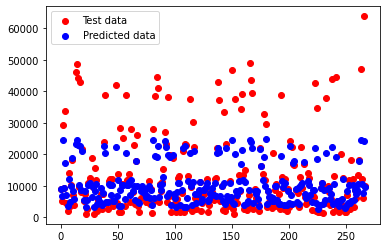

In [16]:
nnr.pred_test_sPlt(y_test.numpy(), y_pred.numpy())

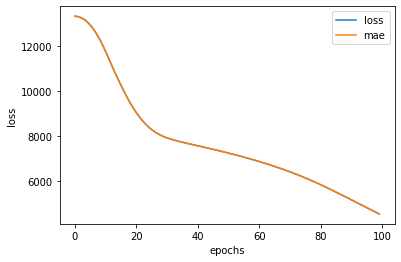

In [56]:
nnr.dataFrame(insurance_m0_h)

In [19]:
nnr.train_eval_comparison_native(insurance_m0_h, eval_insurance_m0)

Training Loss:  4576.813 
Evaluation Loss:  4534.005 
Difference:  42.808


In [20]:
nnr.train_eval_comparison_panda_table(insurance_m0_h, eval_insurance_m0)

,Data,Loss,MAE
0,Training Data,4576.813,4576.813
1,Evaluation Data,4534.005,4534.005
2,Difference,42.808,42.808


In [21]:
insurance_m0.summary()

Model: "Insurance_Prediction_Model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden_layer (Dense)        (None, 10)                120       
                                                                 
 ouput_layer (Dense)         (None, 1)                 11        
                                                                 
Total params: 131
Trainable params: 131
Non-trainable params: 0
_________________________________________________________________


#### Saving/Loading of Models and History and Evaluation of Saved Models and History

##### Saving Model and History

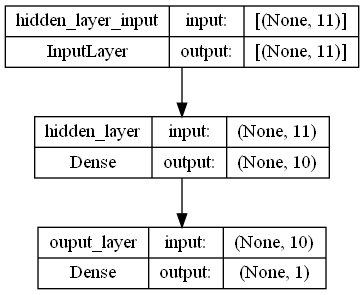

In [22]:
nnr.save("./saved_files/NNRSC/Insurance_Model/m_0/", "insurance_m0", insurance_m0_h, insurance_m0)

##### Loading Model and History

In [50]:
insurance_m0_h5 = tf.keras.models.load_model("./saved_files/NNRSC/Insurance_Model/m_0/insurance_m0.h5")
insurance_m0_h_json = nnr.loadHist("./saved_files/NNRSC/Insurance_Model/m_0/insurance_m0_h.json")

##### Evaluation of Saved Data

In [18]:
eval_insurance_m0 = insurance_m0_h5.evaluate(x_test_n, y_test)

9/9 [==============================] - 0s 4ms/step - loss: 4534.0054 - mae: 4534.0054


In [19]:
y_pred = insurance_m0_h5.predict(x_test_n)

9/9 [==============================] - 0s 3ms/step


In [26]:
y_test = tf.constant(y_test)

In [27]:
index = 0

print("Predicted: ", y_pred[index], "\n",
      "Test: ", y_test[index], "\n",
      "Difference: ", y_test[index] - y_pred[index])

Predicted:  [9161.192] 
 Test:  tf.Tensor(9095.06825, shape=(), dtype=float64) 
 Difference:  tf.Tensor([-66.12413281], shape=(1,), dtype=float64)


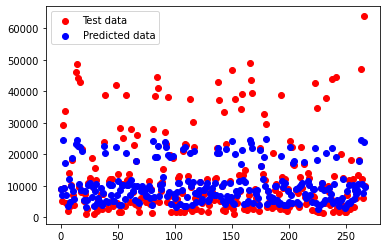

In [21]:
nnr.pred_test_sPlt(y_test.numpy(), y_pred)

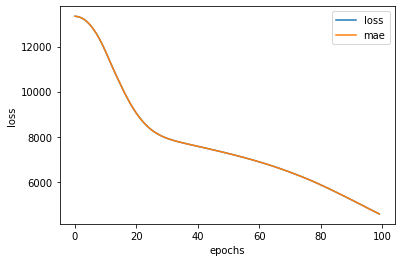

In [52]:
nnr.dataFrame_lh(insurance_m0_h_json)

In [28]:
nnr.train_eval_comparison_native_lh(insurance_m0_h_json, eval_insurance_m0)

Training Loss:  4576.813 
Evaluation Loss:  4534.005 
Difference:  42.808


In [29]:
nnr.train_eval_comparison_panda_table_lh(insurance_m0_h_json, eval_insurance_m0)

,Data,Loss,MAE
0,Training Data,4576.813,4576.813
1,Evaluation Data,4534.005,4534.005
2,Difference,42.808,42.808


### Model 1
- hidden layer units 10 -> 50

(No Difference major with 50 and 100 units)

#### Modeling

In [58]:
insurance_m1 = tf.keras.Sequential(name = "Insurance_Prediction_Model")
insurance_m1.add(tf.keras.layers.Dense(
  units = 50,
  name = "hidden_layer"
))
insurance_m1.add(tf.keras.layers.Dense(
  units = 1,
  name = "ouput_layer"
))

insurance_m1.compile(
  loss = 'mae',
  optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01),
  metrics = 'mae'
)

insurance_m1_h = insurance_m1.fit(x_train_n, y_train, epochs = 100)


Epoch 1/100
34/34 [==============================] - 1s 4ms/step - loss: 13329.9600 - mae: 13329.9600
Epoch 2/100
34/34 [==============================] - 0s 4ms/step - loss: 13236.8545 - mae: 13236.8545
Epoch 3/100
34/34 [==============================] - 0s 4ms/step - loss: 13010.1680 - mae: 13010.1680
Epoch 4/100
34/34 [==============================] - 0s 4ms/step - loss: 12625.7969 - mae: 12625.7969
Epoch 5/100
34/34 [==============================] - 0s 4ms/step - loss: 12080.3018 - mae: 12080.3018
Epoch 6/100
34/34 [==============================] - 0s 4ms/step - loss: 11401.9268 - mae: 11401.9268
Epoch 7/100
34/34 [==============================] - 0s 4ms/step - loss: 10705.8740 - mae: 10705.8740
Epoch 8/100
34/34 [==============================] - 0s 4ms/step - loss: 10048.5654 - mae: 10048.5654
Epoch 9/100
34/34 [==============================] - 0s 3ms/step - loss: 9432.3896 - mae: 9432.3896
Epoch 10/100
34/34 [==============================] - 0s 3ms/step - loss: 8941.4131 

In [59]:
y_test = tf.constant(y_test)

In [67]:
eval_insurance_m1 = insurance_m1.evaluate(x_test_n, y_test)

9/9 [==============================] - 0s 4ms/step - loss: 3381.8792 - mae: 3381.8792


In [61]:
y_pred = nnr.prediction_td(insurance_m1, x_test_n)

9/9 [==============================] - 0s 3ms/step


In [62]:
index = 0

print("Predicted: ", y_pred[index].numpy(), "\n",
      "Test: ", y_test[index].numpy(), "\n",
      "Difference: ", y_test[index].numpy() - y_pred[index].numpy())

Predicted:  9357.246 
 Test:  9095.06825 
 Difference:  -262.17784374999974


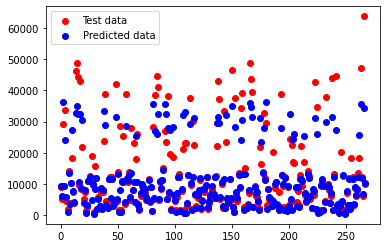

In [63]:
nnr.pred_test_sPlt(y_test.numpy(), y_pred.numpy())

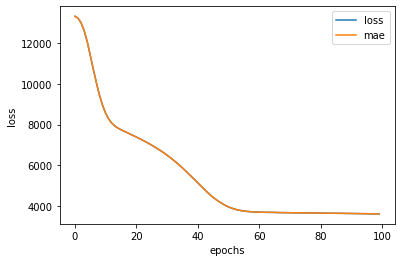

In [65]:
nnr.dataFrame(insurance_m1_h)

In [68]:
nnr.train_eval_comparison_native(insurance_m1_h, eval_insurance_m1)

Training Loss:  3598.518 
Evaluation Loss:  3381.879 
Difference:  216.638


In [69]:
nnr.train_eval_comparison_panda_table(insurance_m1_h, eval_insurance_m1)

,Data,Loss,MAE
0,Training Data,3598.518,3598.518
1,Evaluation Data,3381.879,3381.879
2,Difference,216.638,216.638


#### Saving/Loading of Models and History and Evaluation of Saved Models and History

##### Saving Model and History

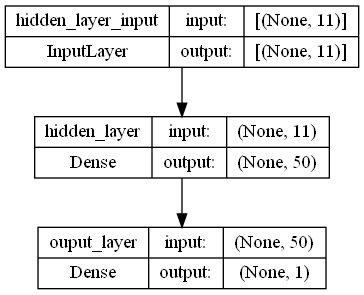

In [29]:
nnr.save("./saved_files/NNRSC/Insurance_Model/m_1/", "insurance_m1", insurance_m1_h, insurance_m1)

##### Loading Model and History

In [53]:
insurance_m1_h5 = tf.keras.models.load_model("./saved_files/NNRSC/Insurance_Model/m_1/insurance_m1.h5")
insurance_m1_h_json = nnr.loadHist("./saved_files/NNRSC/Insurance_Model/m_1/insurance_m1_h.json")

##### Evaluation of Saved Data

In [40]:
eval_insurance_m1 = insurance_m1_h5.evaluate(x_test_n, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 3390.2676 - mae: 3390.2676


In [32]:
y_pred = insurance_m1_h5.predict(x_test_n)

9/9 [==============================] - 0s 4ms/step


In [33]:
y_test = tf.constant(y_test)

In [37]:
index = 0

print("Predicted: ", y_pred[index], "\n",
      "Test: ", y_test[index], "\n",
      "Difference: ", y_test[index] - y_pred[index])

Predicted:  [9183.946] 
 Test:  tf.Tensor(9095.06825, shape=(), dtype=float64) 
 Difference:  tf.Tensor([-88.87803906], shape=(1,), dtype=float64)


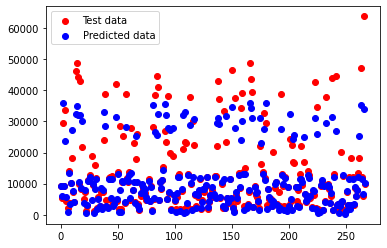

In [38]:
nnr.pred_test_sPlt(y_test.numpy(), y_pred)

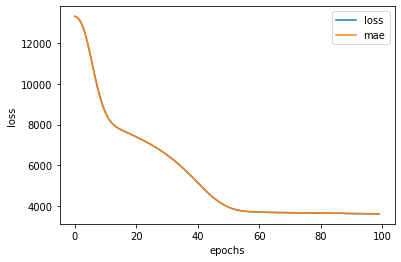

In [54]:
nnr.dataFrame_lh(insurance_m1_h_json)

In [41]:
nnr.train_eval_comparison_native_lh(insurance_m1_h_json, eval_insurance_m1)

Training Loss:  3605.519 
Evaluation Loss:  3390.268 
Difference:  215.251


In [42]:
nnr.train_eval_comparison_panda_table_lh(insurance_m1_h_json, eval_insurance_m1)

,Data,Loss,MAE
0,Training Data,3605.519,3605.519
1,Evaluation Data,3390.268,3390.268
2,Difference,215.251,215.251


### Model 2
- Add another layer with 150 units and relu as activator
- increase epochs with 300

#### Modeling

In [70]:
insurance_m2 = tf.keras.Sequential(name = "Insurance_Prediction_Model")
insurance_m2.add(tf.keras.layers.Dense(
  units = 150,
  name = "hidden_layer_1",
  activation = 'relu'
))
insurance_m2.add(tf.keras.layers.Dense(
  units = 100,
  name = "hidden_layer_2"
))
insurance_m2.add(tf.keras.layers.Dense(
  units = 1,
  name = "ouput_layer"
))

insurance_m2.compile(
  loss = 'mae',
  optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01),
  metrics = 'mae'
)

insurance_m2_h = insurance_m2.fit(x_train_n, y_train, epochs = 300)

Epoch 1/300
34/34 [==============================] - 2s 6ms/step - loss: 12528.0635 - mae: 12528.0635
Epoch 2/300
34/34 [==============================] - 0s 5ms/step - loss: 7979.4497 - mae: 7979.4497
Epoch 3/300
34/34 [==============================] - 0s 4ms/step - loss: 6800.0630 - mae: 6800.0630
Epoch 4/300
34/34 [==============================] - 0s 5ms/step - loss: 4855.7837 - mae: 4855.7837
Epoch 5/300
34/34 [==============================] - 0s 4ms/step - loss: 3604.0237 - mae: 3604.0237
Epoch 6/300
34/34 [==============================] - 0s 4ms/step - loss: 3412.3071 - mae: 3412.3071
Epoch 7/300
34/34 [==============================] - 0s 4ms/step - loss: 3302.5188 - mae: 3302.5188
Epoch 8/300
34/34 [==============================] - 0s 3ms/step - loss: 3271.1091 - mae: 3271.1091
Epoch 9/300
34/34 [==============================] - 0s 4ms/step - loss: 3258.5217 - mae: 3258.5217
Epoch 10/300
34/34 [==============================] - 0s 3ms/step - loss: 3219.5710 - mae: 3219.57

In [71]:
eval_insurance_m2 = insurance_m2.evaluate(x_test_n, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 1766.1194 - mae: 1766.1194


In [73]:
y_pred = insurance_m2.predict(x_test_n)

9/9 [==============================] - 0s 2ms/step


In [76]:
index = 0

print("Predicted: ", y_pred[index], "\n",
      "Test: ", y_test[index].numpy(), "\n",
      "Difference: ", y_test[index].numpy() - y_pred[index])

Predicted:  [9120.027] 
 Test:  9095.06825 
 Difference:  [-24.958984]


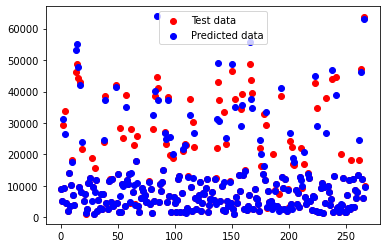

In [77]:
nnr.pred_test_sPlt(y_test.numpy(), y_pred)

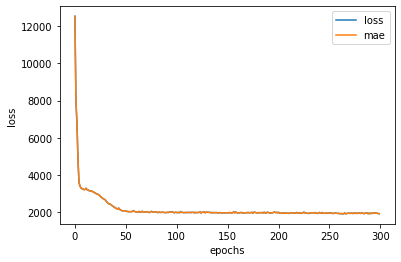

In [78]:
nnr.dataFrame(insurance_m2_h)

In [81]:
nnr.train_eval_comparison_native(insurance_m2_h, eval_insurance_m2)

Training Loss:  1933.789 
Evaluation Loss:  1766.119 
Difference:  167.67


In [82]:
nnr.train_eval_comparison_panda_table(insurance_m2_h, eval_insurance_m2)

,Data,Loss,MAE
0,Training Data,1933.789,1933.789
1,Evaluation Data,1766.119,1766.119
2,Difference,167.670,167.670


#### Saving/Loading of Models and History and Evaluation of Saved Models and History

##### Saving Model and History

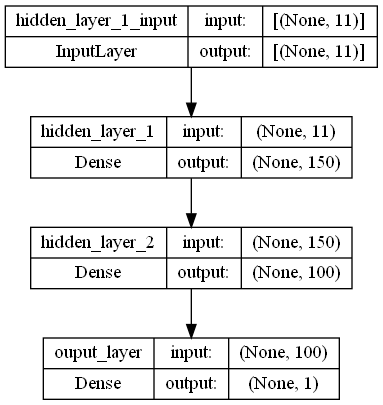

In [83]:
nnr.save("./saved_files/NNRSC/Insurance_Model/m_2/", "insurance_m2", insurance_m2_h, insurance_m2)

##### Loading Model and History

In [91]:
insurance_m2_h5 = tf.keras.models.load_model("./saved_files/NNRSC/Insurance_Model/m_2/insurance_m2.h5")
insurance_m2_h_json = nnr.loadHist("./saved_files/NNRSC/Insurance_Model/m_2/insurance_m2_h.json")

##### Evaluation of Saved Data

In [86]:
eval_insurance_m2 = insurance_m2_h5.evaluate(x_test_n, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 1766.1194 - mae: 1766.1194


In [87]:
y_pred = insurance_m2_h5.predict(x_test_n)

9/9 [==============================] - 0s 2ms/step


In [88]:
index = 0

print("Predicted: ", y_pred[index], "\n",
      "Test: ", y_test[index].numpy(), "\n",
      "Difference: ", y_test[index].numpy() - y_pred[index])

Predicted:  [9120.027] 
 Test:  9095.06825 
 Difference:  [-24.958984]


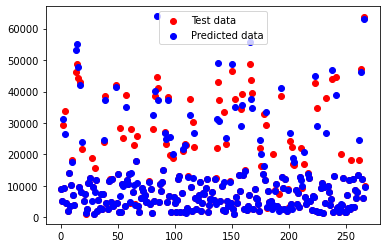

In [89]:
nnr.pred_test_sPlt(y_test.numpy(), y_pred)

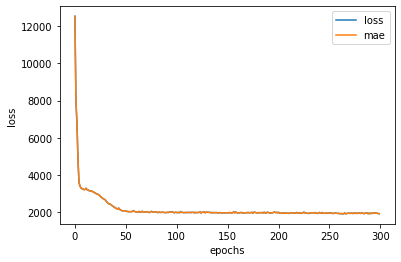

In [93]:
nnr.dataFrame_lh(insurance_m2_h_json)

In [94]:
nnr.train_eval_comparison_native_lh(insurance_m2_h_json, eval_insurance_m2)

Training Loss:  1933.789 
Evaluation Loss:  1766.119 
Difference:  167.67


In [95]:
nnr.train_eval_comparison_panda_table_lh(insurance_m2_h_json, eval_insurance_m2)

,Data,Loss,MAE
0,Training Data,1933.789,1933.789
1,Evaluation Data,1766.119,1766.119
2,Difference,167.670,167.670


### Model 3
- Increase 150 -> 250 units

#### Modeling

In [126]:
insurance_m3 = tf.keras.Sequential(name = "Insurance_Prediction_Model")
insurance_m3.add(tf.keras.layers.Dense(
  units = 250,
  name = "hidden_layer_1",
  activation = 'relu'
))
insurance_m3.add(tf.keras.layers.Dense(
  units = 150,
  name = "hidden_layer_2",
))
insurance_m3.add(tf.keras.layers.Dense(
  units = 100,
  name = "hidden_layer_3"
))
insurance_m3.add(tf.keras.layers.Dense(
  units = 1,
  name = "ouput_layer",
  activation = "relu"
))

insurance_m3.compile(
  loss = 'mae',
  optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01),
  metrics = 'mae'
)

insurance_m3_h = insurance_m3.fit(x_train_n, y_train, epochs = 300)

Epoch 1/300
34/34 [==============================] - 2s 5ms/step - loss: 9753.9014 - mae: 9753.9014
Epoch 2/300
34/34 [==============================] - 0s 5ms/step - loss: 4806.4199 - mae: 4806.4199
Epoch 3/300
34/34 [==============================] - 0s 5ms/step - loss: 3511.3386 - mae: 3511.3386
Epoch 4/300
34/34 [==============================] - 0s 5ms/step - loss: 3249.7253 - mae: 3249.7253
Epoch 5/300
34/34 [==============================] - 0s 5ms/step - loss: 3287.0872 - mae: 3287.0872
Epoch 6/300
34/34 [==============================] - 0s 5ms/step - loss: 3189.7581 - mae: 3189.7581
Epoch 7/300
34/34 [==============================] - 0s 5ms/step - loss: 3154.0547 - mae: 3154.0547
Epoch 8/300
34/34 [==============================] - 0s 5ms/step - loss: 2947.7520 - mae: 2947.7520
Epoch 9/300
34/34 [==============================] - 0s 5ms/step - loss: 2718.4121 - mae: 2718.4121
Epoch 10/300
34/34 [==============================] - 0s 5ms/step - loss: 2832.9478 - mae: 2832.9478

In [128]:
eval_insurance_m3 = insurance_m3.evaluate(x_test_n, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 1815.7798 - mae: 1815.7798


In [129]:
y_pred = insurance_m3.predict(x_test_n)

9/9 [==============================] - 2s 4ms/step


In [130]:
index = 0

print("Predicted: ", y_pred[index], "\n",
      "Test: ", y_test[index].numpy(), "\n",
      "Difference: ", y_test[index].numpy() - y_pred[index])

Predicted:  [8950.332] 
 Test:  9095.06825 
 Difference:  [144.73633]


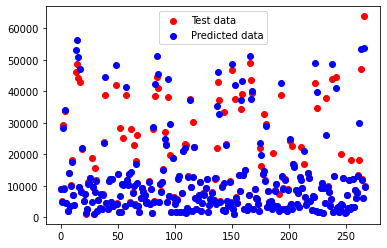

In [131]:
nnr.pred_test_sPlt(y_test.numpy(), y_pred)

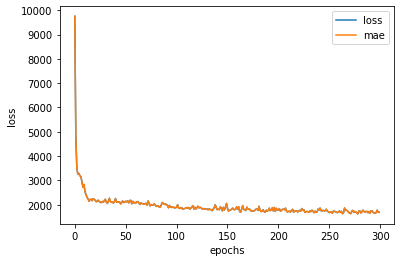

In [127]:
nnr.dataFrame(insurance_m3_h)

In [133]:
nnr.train_eval_comparison_native(insurance_m3_h, eval_insurance_m3)

Training Loss:  1685.682 
Evaluation Loss:  1815.78 
Difference:  130.098


In [134]:
nnr.train_eval_comparison_panda_table(insurance_m3_h, eval_insurance_m3)

,Data,Loss,MAE
0,Training Data,1685.682,1685.682
1,Evaluation Data,1815.780,1815.780
2,Difference,-130.098,-130.098


#### Saving/Loading of Models and History and Evaluation of Saved Models and History

##### Saving Model and History

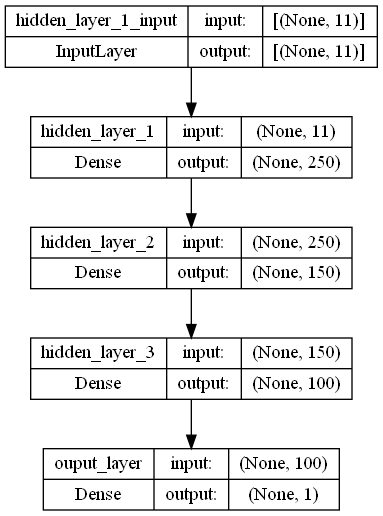

In [135]:
nnr.save("./saved_files/NNRSC/Insurance_Model/m_3/", "insurance_m3", insurance_m3_h, insurance_m3)

##### Loading Model and History

In [136]:
insurance_m3_h5 = tf.keras.models.load_model("./saved_files/NNRSC/Insurance_Model/m_3/insurance_m3.h5")
insurance_m3_h_json = nnr.loadHist("./saved_files/NNRSC/Insurance_Model/m_3/insurance_m3_h.json")

##### Evaluation of Saved Data

In [139]:
eval_insurance_m3 = insurance_m3_h5.evaluate(x_test_n, y_test)

9/9 [==============================] - 0s 5ms/step - loss: 1815.7798 - mae: 1815.7798


In [141]:
y_pred = insurance_m3_h5.predict(x_test_n)

9/9 [==============================] - 0s 4ms/step


In [142]:
index = 0

print("Predicted: ", y_pred[index], "\n",
      "Test: ", y_test[index].numpy(), "\n",
      "Difference: ", y_test[index].numpy() - y_pred[index])

Predicted:  [8950.332] 
 Test:  9095.06825 
 Difference:  [144.73633]


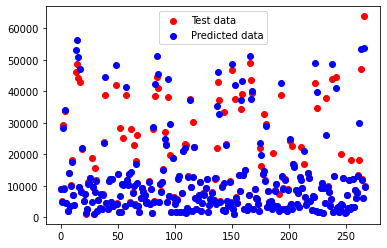

In [144]:
nnr.pred_test_sPlt(y_test.numpy(), y_pred)

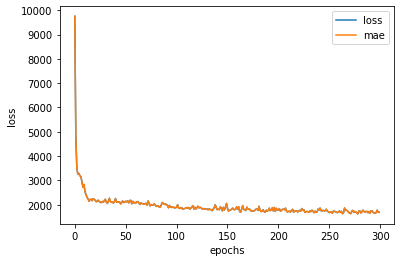

In [145]:
nnr.dataFrame_lh(insurance_m3_h_json)

In [146]:
nnr.train_eval_comparison_native_lh(insurance_m3_h_json, eval_insurance_m3)

Training Loss:  1685.682 
Evaluation Loss:  1815.78 
Difference:  130.098


In [147]:
nnr.train_eval_comparison_panda_table_lh(insurance_m3_h_json, eval_insurance_m3)

,Data,Loss,MAE
0,Training Data,1685.682,1685.682
1,Evaluation Data,1815.780,1815.780
2,Difference,-130.098,-130.098


### Model 4

#### Modeling

In [156]:
insurance_m4 = tf.keras.Sequential(name = "Insurance_Prediction_Model")
insurance_m4.add(tf.keras.layers.Dense(
  units = 500,
  name = "hidden_layer_1",
  activation = 'relu'
))
insurance_m4.add(tf.keras.layers.Dense(
  units = 250,
  name = "hidden_layer_2",
))
insurance_m4.add(tf.keras.layers.Dense(
  units = 150,
  name = "hidden_layer_3"
))
insurance_m4.add(tf.keras.layers.Dense(
  units = 1,
  name = "ouput_layer",
  activation = "relu"
))

insurance_m4.compile(
  loss = 'mae',
  optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01),
  metrics = 'mae'
)

insurance_m4_h = insurance_m4.fit(x_train_n, y_train, epochs = 300)

Epoch 1/300
34/34 [==============================] - 2s 7ms/step - loss: 8805.3818 - mae: 8805.3818
Epoch 2/300
34/34 [==============================] - 0s 7ms/step - loss: 3988.8303 - mae: 3988.8303
Epoch 3/300
34/34 [==============================] - 0s 7ms/step - loss: 3482.9143 - mae: 3482.9143
Epoch 4/300
34/34 [==============================] - 0s 7ms/step - loss: 3449.5200 - mae: 3449.5200
Epoch 5/300
34/34 [==============================] - 0s 7ms/step - loss: 3034.6873 - mae: 3034.6873
Epoch 6/300
34/34 [==============================] - 0s 6ms/step - loss: 2816.0742 - mae: 2816.0742
Epoch 7/300
34/34 [==============================] - 0s 7ms/step - loss: 2659.6057 - mae: 2659.6057
Epoch 8/300
34/34 [==============================] - 0s 7ms/step - loss: 2462.4314 - mae: 2462.4314
Epoch 9/300
34/34 [==============================] - 0s 7ms/step - loss: 2488.0413 - mae: 2488.0413
Epoch 10/300
34/34 [==============================] - 0s 6ms/step - loss: 2361.2437 - mae: 2361.2437

In [157]:
eval_insurance_m4 = insurance_m4.evaluate(x_test_n, y_test)

9/9 [==============================] - 0s 5ms/step - loss: 1569.0396 - mae: 1569.0396


In [158]:
y_pred = insurance_m4.predict(x_test_n)

9/9 [==============================] - 0s 4ms/step


In [159]:
index = 0

print("Predicted: ", y_pred[index], "\n",
      "Test: ", y_test[index].numpy(), "\n",
      "Difference: ", y_test[index].numpy() - y_pred[index])

Predicted:  [8992.197] 
 Test:  9095.06825 
 Difference:  [102.87109]


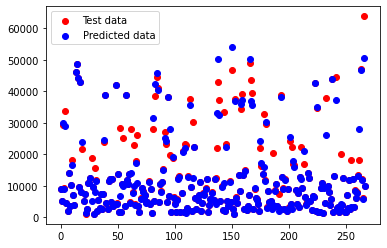

In [160]:
nnr.pred_test_sPlt(y_test.numpy(), y_pred)

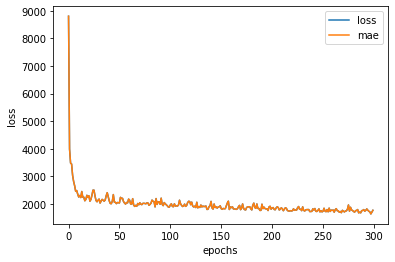

In [161]:
nnr.dataFrame(insurance_m4_h)

In [162]:
nnr.train_eval_comparison_native(insurance_m4_h, eval_insurance_m4)

Training Loss:  1772.072 
Evaluation Loss:  1569.04 
Difference:  203.032


In [163]:
nnr.train_eval_comparison_panda_table(insurance_m4_h, eval_insurance_m4)

,Data,Loss,MAE
0,Training Data,1772.072,1772.072
1,Evaluation Data,1569.040,1569.040
2,Difference,203.032,203.032


#### Saving/Loading of Models and History and Evaluation of Saved Models and History

##### Saving Model and History

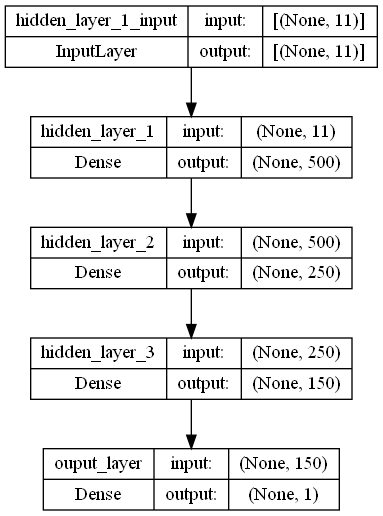

In [164]:
nnr.save("./saved_files/NNRSC/Insurance_Model/m_4/", "insurance_m4", insurance_m4_h, insurance_m4)

##### Loading Model and History

In [165]:
insurance_m4_h5 = tf.keras.models.load_model("./saved_files/NNRSC/Insurance_Model/m_4/insurance_m4.h5")
insurance_m4_h_json = nnr.loadHist("./saved_files/NNRSC/Insurance_Model/m_4/insurance_m4_h.json")

##### Evaluation of Saved Data

In [166]:
eval_insurance_m4 = insurance_m4_h5.evaluate(x_test_n, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 1569.0396 - mae: 1569.0396


In [167]:
y_pred = insurance_m4_h5.predict(x_test_n)

9/9 [==============================] - 0s 2ms/step


In [168]:
index = 0

print("Predicted: ", y_pred[index], "\n",
      "Test: ", y_test[index].numpy(), "\n",
      "Difference: ", y_test[index].numpy() - y_pred[index])

Predicted:  [8992.197] 
 Test:  9095.06825 
 Difference:  [102.87109]


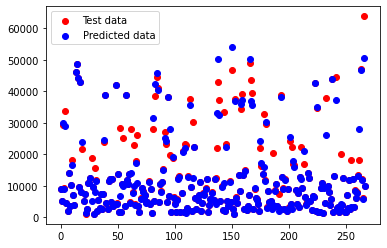

In [169]:
nnr.pred_test_sPlt(y_test.numpy(), y_pred)

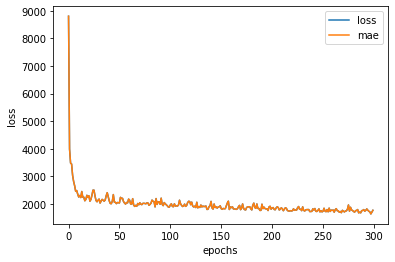

In [170]:
nnr.dataFrame(insurance_m4_h)

In [171]:
nnr.train_eval_comparison_native(insurance_m4_h, eval_insurance_m4)

Training Loss:  1772.072 
Evaluation Loss:  1569.04 
Difference:  203.032


In [172]:
nnr.train_eval_comparison_panda_table(insurance_m4_h, eval_insurance_m4)


,Data,Loss,MAE
0,Training Data,1772.072,1772.072
1,Evaluation Data,1569.040,1569.040
2,Difference,203.032,203.032


### Model Summary

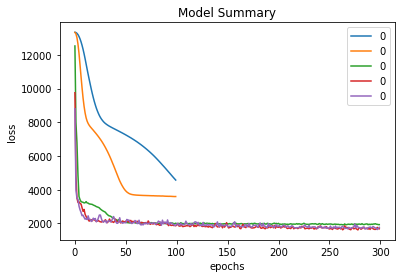

In [175]:
ax = pd.DataFrame(insurance_m0_h_json["loss"]).plot(title = "Model Summary")
plt.ylabel("loss")
plt.xlabel("epochs")
pd.DataFrame(insurance_m1_h_json["loss"]).plot(ax = ax)
pd.DataFrame(insurance_m2_h_json["loss"]).plot(ax = ax)
pd.DataFrame(insurance_m3_h_json["loss"]).plot(ax = ax)
pd.DataFrame(insurance_m4_h_json["loss"]).plot(ax = ax)

plt.savefig("./saved_files/NNRSC/Insurance_Model/Summary_plot.png")
plt.show()